# Single Session

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from IPython.display import HTML

In [2]:
df = pd.read_csv('Data/no_attr/test_results/all_results_topk_3.csv')
df.method = df.method.apply(lambda x: '  '+x.upper() if (x != 'Knn') & (x != 'Mmr') else ' '+x.upper() if x == 'Mmr'
                            else x.upper())

df2 = df[df.method == 'KNN']
df = df[df.method != 'KNN']

df2.diversity = df2.diversity.apply(lambda x: str([float(x),0,0]))
df = pd.concat([df,df2])

In [3]:
df_3 = pd.DataFrame()

for i in range(3): #3 number of sessions
    
    df_2 = df.copy()
    df_2['sess'] = i
        
    for idx, col in enumerate(['precision','recall','diversity','alpha_ndcg']):
        aa = list(df[col].apply(lambda x: x.split('[')[1].split(']')[0].split(',')))
        aa = np.array(aa)
    
        df_2[col] = aa[:,i]
        df_2[col] = df_2[col].astype(float)
            
    if i == 0 and idx == 0:
        df_3 = df_2
    else:
        df_3 = pd.concat([df_3,df_2])
        
df = df.drop(columns=['precision','recall','diversity','alpha_ndcg'])

In [4]:
df = df.merge(df_3,on=['method','nb_attributes','time','attr_precision'])
df = df.drop_duplicates()

for i in range(aa.shape[1]):
    df[f'harmo'] = df[f'precision']+df[f'diversity']
    df[f'harmo'] = (2*df[f'precision']*df[f'diversity'])/df[f'harmo']
    
df = df.groupby(['method','nb_attributes','sess']).mean().reset_index()
df = df[df.method.isin(['  SMORL_0.003_100_64',' MMR','  SWAP','KNN'])]

df = df.replace({'  SMORL_0.003_100_64':'  SMORL'})

Time

In [5]:
wdth = 550
heit = 250

graph_time = alt.Chart(df[(df.method != 'KNN') & (df.sess == 0)]).\
                mark_line(interpolate='basis',strokeWidth=3).encode(
    
    alt.X('nb_attributes:N', axis=alt.Axis(title="#Attributes",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('time', axis=alt.Axis(title="Response Time (sec - Logsclae)",tickCount=3,
                                         labelFontSize=19,
                                         titleFontSize=19,),
              scale=alt.Scale(type="log")),
    
    color=alt.Color('method',title='', legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [6]:
graph_time

alt.Chart(...)

Diversity

In [7]:
wdth = 550
heit = 250

graph_div = alt.Chart(df[(df.method != 'KNN') & (df.sess == 0)]).\
                mark_line(interpolate='basis',strokeWidth=3).encode(
    
    alt.X('nb_attributes:N', axis=alt.Axis(title="#Attributes",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('diversity', axis=alt.Axis(title="Intra Diversity",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),
    
    
    color=alt.Color('method',title='', legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [8]:
graph_div

alt.Chart(...)

Precision

In [9]:
wdth = 550
heit = 250

graph_prec = alt.Chart(df[(df.method != 'KNN') & (df.sess == 0)]).\
            mark_line(interpolate='basis',strokeWidth=3).encode(
    
    alt.X('nb_attributes:N', axis=alt.Axis(title="#Attributes",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('precision', axis=alt.Axis(title="Precision",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),
    
    color=alt.Color('method',title='', legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [10]:
graph_prec

alt.Chart(...)

Recall

In [11]:
wdth = 550
heit = 250

graph_rec = alt.Chart(df[(df.method != 'KNN') & (df.sess == 0)]).\
            mark_line(interpolate='basis',strokeWidth=3).encode(
    alt.X('nb_attributes:N', axis=alt.Axis(title="#Attributes",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('recall', axis=alt.Axis(title="Recall",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),
    
    color=alt.Color('method',title='', legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [12]:
graph_rec

alt.Chart(...)

αnDCG

In [13]:
wdth = 550
heit = 250

graph_ndcg = alt.Chart(df[(df.method != 'KNN') & (df.sess == 0)]).\
        mark_line(interpolate='basis',strokeWidth=3).encode(
    
    alt.X('nb_attributes:N', axis=alt.Axis(title="#Attributes",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('alpha_ndcg', axis=alt.Axis(title="αnDCG",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),
    
    color=alt.Color('method',title='',legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [14]:
graph_ndcg

alt.Chart(...)

F-Score

In [15]:
wdth = 550
heit = 250

graph_f1 = alt.Chart(df[(df.method != 'KNN') & (df.sess == 0)]).\
            mark_line(interpolate='basis',strokeWidth=3).encode(
    
    alt.X('nb_attributes:N', axis=alt.Axis(title="#Attributes",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('harmo', axis=alt.Axis(title="FScore",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),
    
    color=alt.Color('method',title='', legend=None
                   #legend=alt.Legend(orient='bottom',columns=3, titleFontSize=25, 
                   #                                     labelFontSize=20,labelFontStyle='bold', 
                   #                                     titleFontStyle='italic',titleFont = 'Time New Roman',
                   #                                     labelFont='Time New Roman',symbolSize=4000, 
                   #                                     symbolStrokeWidth=3.5,symbolFillColor='black',
                   #                                    symbolStrokeColor='black')
                   ),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [16]:
graph_f1

alt.Chart(...)

# Multiple Sessions

In [17]:
df.sess = df.sess+1

Diversity

In [18]:
wdth = 550
heit = 250

graph_div_mult = alt.Chart(df[(df.method != 'KNN') & (df.nb_attributes == 5)]).\
                    mark_line(interpolate='basis',strokeWidth=3).encode(
    alt.X('sess:N', axis=alt.Axis(title="Sessions",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('diversity', axis=alt.Axis(title="Intra Diversity",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),
    
    color=alt.Color('method',title='', legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [19]:
graph_div_mult

alt.Chart(...)

Precision

In [20]:
wdth = 550
heit = 250

graph_prec_mult = alt.Chart(df[(df.method != 'KNN') & (df.nb_attributes == 5)]).\
                    mark_line(interpolate='basis',strokeWidth=3).encode(
    alt.X('sess:N', axis=alt.Axis(title="Sessions",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('precision', axis=alt.Axis(title="Precision",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),

    color=alt.Color('method',title='', legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [21]:
graph_prec_mult

alt.Chart(...)

αnDCG

In [22]:
wdth = 550
heit = 250

graph_harmo_mult = alt.Chart(df[(df.method != 'KNN') & (df.nb_attributes == 5)]).\
                    mark_line(interpolate='basis',strokeWidth=3).encode(

    alt.X('sess:N', axis=alt.Axis(title="Sessions",
                                             labelFontSize=19,
                                             labelAngle=0,
                                             titleFontSize=19)),

        alt.Y('alpha_ndcg', axis=alt.Axis(title="αnDCG",
                                         labelFontSize=19,
                                         titleFontSize=19),
              scale=alt.Scale(zero=False)),
    
    color=alt.Color('method',title='', legend=None),
    strokeDash=alt.StrokeDash('method',title='')
).properties(
    width = wdth,
    height = heit
)

In [23]:
graph_harmo_mult

alt.Chart(...)

# Transfer Learning

In [24]:
alt.data_transformers.disable_max_rows()
alt.renderers.enable('svg')

HTML('''
<svg height="0" width="0" xmlns="http://www.w3.org/2000/svg" version="1.1">
    <defs>

        <!-- From SVG stripe generator 
        https://www.coffee-break-designs.com/labs/svg_stripe_generator/ -->
        <pattern id="pattern_0" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(0)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#CB37A5" stroke-width="15" />
        </pattern>
        
        <pattern id="pattern_1" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#1F77B4" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_2" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#FF7F0E" stroke-width="4" />
        </pattern>

        <pattern id="pattern_3" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(0)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#2CA02C" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_4" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#D62728" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_5" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#9467BD" stroke-width="4" />
            <line x1="0" y="0" x2="5" y2="0" stroke="#9467BD" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_6" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="5" y2="0" stroke="#8C564B" stroke-width="4" />
            <line x1="0" y="0" x2="0" y2="5" stroke="#8C564B" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_7" patternUnits="userSpaceOnUse" width="10" height="10" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="10" stroke="#316B83" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_8" patternUnits="userSpaceOnUse" width="10" height="10" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="10" stroke="#CE6DBD" stroke-width="4" />
        </pattern>
        
    </defs>
</svg>
''')

In [25]:
df = pd.read_csv('Data/no_attr/test_results/all_results_topk_3_transfer_div.csv')
df.test_classe = df.test_classe+1

df_second = df[df.test_classe==0]

df_third = df[((df.test_classe==1) & (df.method=='SMORL_0')) | ((df.test_classe==2) & (df.method=='SMORL_1')) 
             | ((df.test_classe==3) & (df.method=='SMORL_2'))]

df = df[df.test_classe!=0]

In [26]:
df_second = df_second.append(df_third)
del df_third

In [27]:
df_4 = pd.DataFrame()

for i in range(1):    
    df_2 = df_second.copy()
        
    for idx, col in enumerate(['precision','recall','diversity','alpha_ndcg']):
        aa = list(df_second[col].apply(lambda x: x.split('[')[1].split(']')[0].split(',')))
        aa = np.array(aa)
    
        df_2[col] = aa[:,i]
        df_2[col] = df_2[col].astype(float)
            
    if i == 0 and idx == 0:
        df_4 = df_2
    else:
        df_4 = pd.concat([df_4,df_2])
        

In [28]:
df_4[f'harmo'] = df_4[f'precision']+df_4[f'diversity']
df_4[f'harmo'] = (2*df_4[f'precision']*df_4[f'diversity'])/df_4[f'harmo']

df_4.test_classe = df_4.test_classe.apply(lambda x :'Known' if x>0 else 'Unknown')
df_4 = df_4.replace({'SMORL_0':'Low div','SMORL_1':'Medium div','SMORL_2':'High div'})
df_5 = df_4.copy()

df_4 = df_4.groupby(['method','test_classe','time']).mean().reset_index()

In [29]:
pattern_scale = ({
       'range': ['url(#pattern_1)', 'url(#pattern_2)', 'url(#pattern_3)',
                 'url(#pattern_4)','url(#pattern_5)','url(#pattern_6)','url(#pattern_7)','url(#pattern_8)']
    })

Precision

In [30]:
wdth = 200
heit = 350

charts = None

for idx,classe in enumerate(['Low div','Medium div','High div']):
    
    graph_prec_transfer = alt.Chart(df_4[(df_4.method==classe)]).\
    mark_bar().encode(
        alt.X('test_classe:N', axis=alt.Axis(title="Test Set",
                                             labelAlign='center',
                                             labelFontSize=18,
                                             labelAngle=0,
                                             titleFontSize=17)),
        
        alt.Y('precision', axis=alt.Axis(title="Precision",
                                         labelFontSize=15,
                                         titleFontSize=17),
              scale=alt.Scale(domain=(0,1.2))),
        
        color = alt.Color('test_classe', legend=None),
        
        fill = alt.Fill('test_classe:N',title='',scale=pattern_scale, legend = None)
        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, titleFontStyle='italic',
        #                  labelFontStyle='bold',titleFont = 'Time New Roman',\
        #                    labelFont='Time New Roman',symbolSize=500) )
        
    ).properties(
        width = wdth,
        height = heit
    )
    
    errorbars = alt.Chart(df_5[(df_5.method==classe)]).mark_errorbar(extent='ci',color='red').encode(
        x="test_classe",
        y = alt.Y('precision', axis=alt.Axis(title='')),
    )
    
    if idx == 0:
        charts = (graph_prec_transfer+errorbars).properties(title=f'{classe}ersity')
    else:
        charts = charts | (graph_prec_transfer+errorbars).properties(title= f'{classe}ersity')

charts = charts.configure_title(fontSize=16)

WARN Dropping color encoding as the plot also has fill.
WARN Dropping color encoding as the plot also has fill.
WARN Dropping color encoding as the plot also has fill.


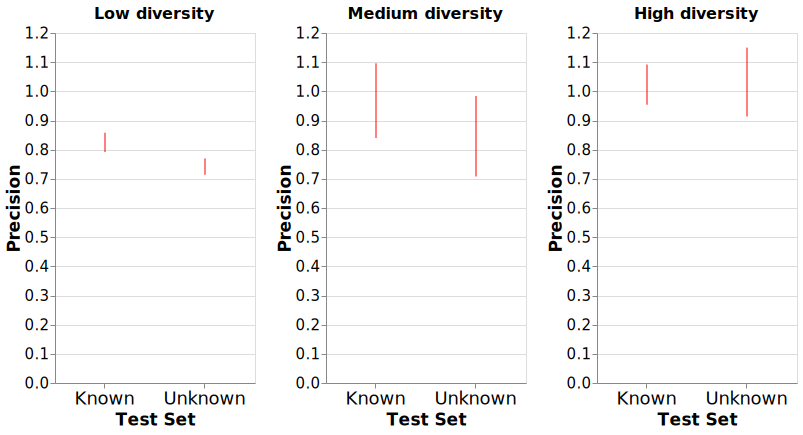

In [31]:
charts

Diversity

In [32]:
wdth = 200
heit = 350

charts = None

for idx,classe in enumerate(['Low div','Medium div','High div']):
    graph_prec_transfer = alt.Chart(df_4[(df_4.method==classe)]).\
    mark_bar().encode(
         alt.X('test_classe:N', axis=alt.Axis(title="Test Set",
                                             labelFontSize=17,
                                             labelAngle=0,
                                             titleFontSize=17)),
        
        alt.Y('diversity', axis=alt.Axis(title="Intra Diversity",
                                         labelFontSize=15,
                                         titleFontSize=17),
              scale=alt.Scale(domain=(0,0.55))),
        
        color = alt.Color('test_classe', legend=None),
        fill = alt.Fill('test_classe:N',title='',scale=pattern_scale, legend = None)
    ).properties(
        width = wdth,
        height = heit
    )
    
    errorbars = alt.Chart(df_5[(df_5.method==classe)]).mark_errorbar(extent='ci',color='red').encode(
        x="test_classe",
        y = alt.Y('diversity', axis=alt.Axis(title='')),
    )
    
    if idx == 0:
        charts = (graph_prec_transfer+errorbars).properties(title=f'{classe}ersity')
    else:
        charts = charts | (graph_prec_transfer+errorbars).properties(title=f'{classe}ersity')
        
charts = charts.configure_title(fontSize=16)

WARN Dropping color encoding as the plot also has fill.
WARN Dropping color encoding as the plot also has fill.
WARN Dropping color encoding as the plot also has fill.


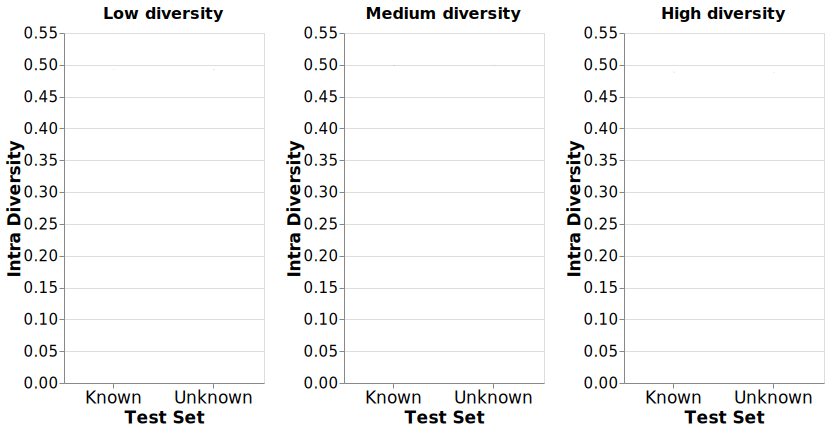

In [33]:
charts

F-Score

In [34]:
wdth = 200
heit = 350

charts = None

for idx,classe in enumerate(['Low div','Medium div','High div']):
    graph_prec_transfer = alt.Chart(df_4[(df_4.method==classe)]).\
    mark_bar().encode(
        alt.X('test_classe:N', axis=alt.Axis(title="Test Set",
                                             labelFontSize=17,
                                             labelAngle=0,
                                             titleFontSize=17)),
        
        alt.Y('harmo', axis=alt.Axis(title="F-Score",
                                         labelFontSize=15,
                                         titleFontSize=17),
              scale=alt.Scale(domain=(0,0.7))),
        
        color = alt.Color('test_classe', legend=None),
        fill = alt.Fill('test_classe:N',title='',scale=pattern_scale, legend = None)
        
    ).properties(
        width = wdth,
        height = heit
    )
    
    errorbars = alt.Chart(df_5[(df_5.method==classe)]).mark_errorbar(extent='ci',color='red').encode(
        x="test_classe",
        y = alt.Y('harmo', axis=alt.Axis(title='')),
    )
    
    if idx == 0:
        charts = (graph_prec_transfer+errorbars).properties(title=f'{classe}ersity')
    else:
        charts = charts | (graph_prec_transfer+errorbars).properties(title=f'{classe}ersity')
        
charts = charts.configure_title(fontSize=16)

WARN Dropping color encoding as the plot also has fill.
WARN Dropping color encoding as the plot also has fill.
WARN Dropping color encoding as the plot also has fill.


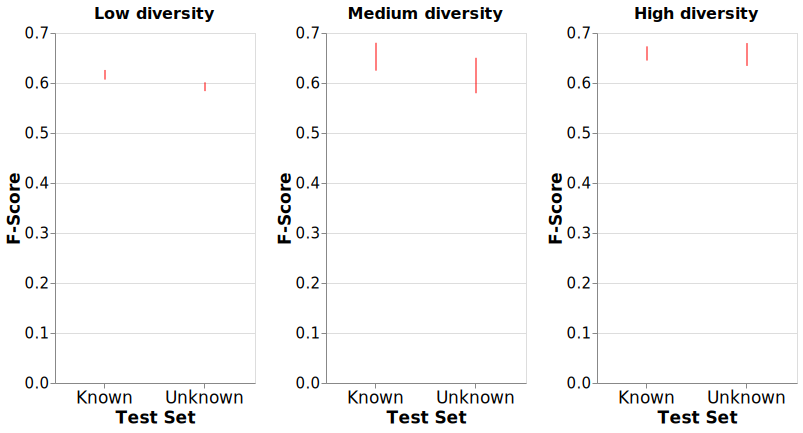

In [35]:
charts

# Parameters Tuning

In [36]:
df = pd.read_csv('Data/no_attr/test_results/all_results_parameters.csv')

df['harmo'] = df['precision']+df['diversity']
df['harmo'] = (2*df['precision']*df['diversity'])/df['harmo']

df_dqn = df
df_dqn = df_dqn.groupby(['batch_size','state_size','l_r']).mean().reset_index()

In [37]:
df_dqn = df_dqn.astype({'state_size':str,'l_r':str, 'batch_size':str, 'decay/worker':str})
df_dqn['Method'] = df_dqn.batch_size + '_' + df_dqn.state_size + '_' +df_dqn.l_r + '_'+df_dqn['decay/worker']

Diversity

In [38]:
wdth = 550
heit = 250

graph_div = alt.Chart(df_dqn).mark_bar().encode(
    alt.X('Method:N', axis=alt.Axis(title="Method")),
    alt.Y('diversity', axis=alt.Axis(title="Intra Diversity"),scale=alt.Scale(zero=False)),
    color=alt.Color('Method',title='')
).properties(
    width = wdth,
    height = heit
)

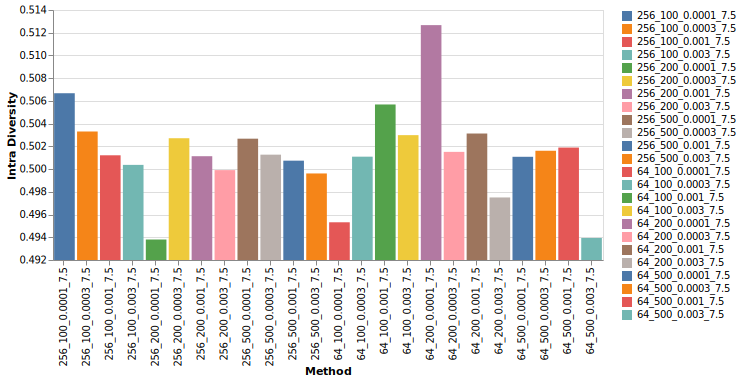

In [39]:
graph_div

Precision

In [40]:
wdth = 550
heit = 250

graph_prec = alt.Chart(df_dqn).mark_bar().encode(
    alt.X('Method:N', axis=alt.Axis(title="Method")),
    alt.Y('precision', axis=alt.Axis(title="Precision"),scale=alt.Scale(zero=False)),
    color=alt.Color('Method',title='')
).properties(
    width = wdth,
    height = heit
)

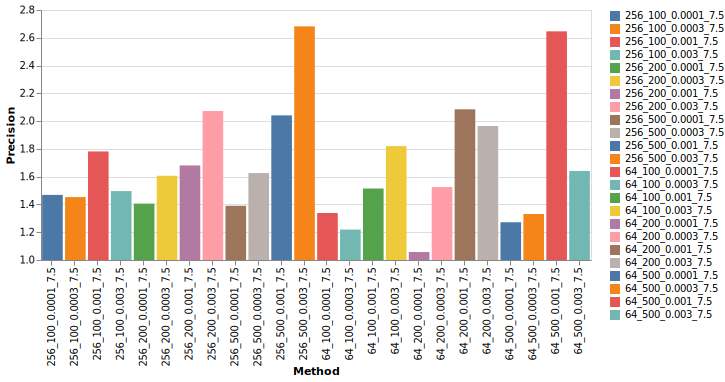

In [41]:
graph_prec

αnDCG

In [42]:
wdth = 550
heit = 250

graph_ndcg = alt.Chart(df_dqn).mark_bar().encode(
    alt.X('Method:N', axis=alt.Axis(title="Method")),
    alt.Y('alpha_ndcg', axis=alt.Axis(title="alpha_ndcg"),scale=alt.Scale(zero=False)),
    color=alt.Color('Method',title='')
).properties(
    width = wdth,
    height = heit
)

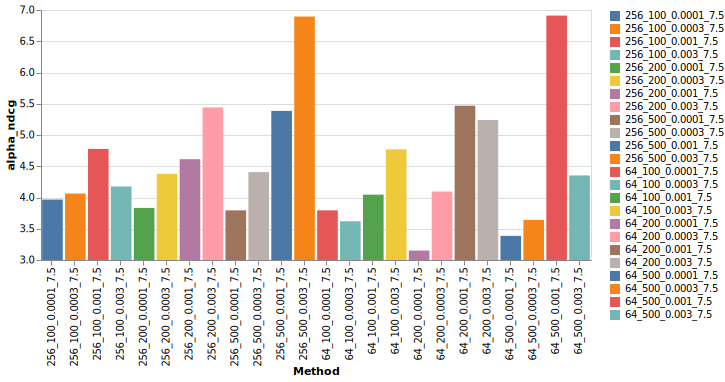

In [43]:
graph_ndcg

F-Score

In [44]:
wdth = 550
heit = 250

graph_f1 = alt.Chart(df_dqn).mark_bar().encode(
    alt.X('Method:N', axis=alt.Axis(title="Method")),
    alt.Y('harmo', axis=alt.Axis(title="F1 Score"),scale=alt.Scale(zero=False)),
    color=alt.Color('Method',title='')
).properties(
    width = wdth,
    height = heit
)

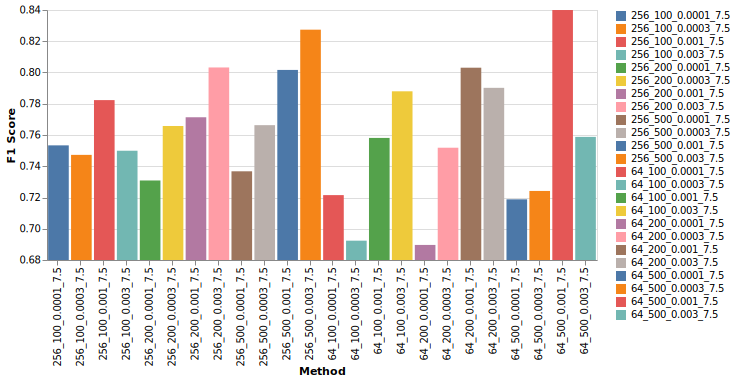

In [45]:
graph_f1